# Is the Shape of fMRI Hemodynamic Responses Relevant for Studying Neural Function
## Abstract
Variations in the shape of the hemodynamic function is typically considered strictly dependant on vascular-related factors and irrelevant to the study of neural function--neural activity in a given piece of brain tissue triggers a stereotypical reponse time course. Recent work however suggest the temporal shape of a response varies according to stimulus or task conditions, suggesting different shapes may be diagnostic of different underlying neural processes.

[working model with inhibition]

[confirms prediction of the model only for overlaid stimuli] Here show that one temporal shape parameter, the delay of the fMRI BOLD response, is increased when competing visual stimuli are overlayed, but not unaffeted when stimuli are presented alone.

We interpret our results as evidence that the hemodynamic delay may reflect the balance between excitation and inhibition involve in local neural processes.

With further experimental validation, this could bring fMRI methods beyond the mapping of brain functions and closer to more clinically-relevant descriptions neural processes within a given brain tissue.
## Context
## Working Model and Hypothesis

## Experimental Approach and Data Acquisition
### Stimuli
### Functional MRI Paradigm
In each run, stimuli were presented at one of two orthogonal orientations (+/- 45 degrees) in alternating 6-sec ON and 6-sec OFF blocs. This produced sinusoidal BOLD signal variations in V1 cortex.

Please get the data from the repo if not done already
data repo: /Users/sebastienproulx/OneDrive - McGill University/dataBig
IN: anatomical V1 roi (C-derived/DecodingHR/anat/z)
IN: preprocessed functionals (C-derived/DecodingHR/fun/x)
IN: stimulus timing (B-clean/DecodingHR/stim/160118_cyclicStim/data)
F(IN)=OUT: 2-df sinusoidal fit to single voxel time series
OUT: fit params and stats + HRF estimates (C-derived/DecodingHR/fun/y)
Not actually running because way too long


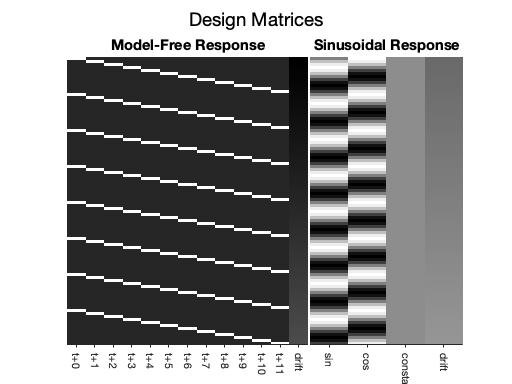

In [1]:
clear all
addpath(genpath(fullfile(pwd,'matlabFun')));
runFit

IN: anatomical V1 roi (C-derived\DecodingHR\anat\z)
IN: voxel visual field eccentricity (C-derived\DecodingHR\anat\z)
IN: sinusoidal fit results (C-derived\DecodingHR\fun\y)
F(IN)=OUT: masks the fit according to voxel eccentricity and activation level
Figures are additionally thresholded for activation level, but not the data that is saved!
OUT: sinusoidal fit results (C-derived\DecodingHR\fun\zSin)


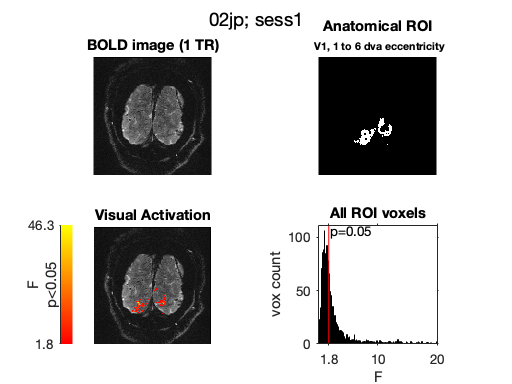

In [2]:
maskSinAndHrFit

## Prediction 1: Competing stimuli evoke a more delayed HR, compared to stimuli presented alone.

### Compare responses evoked by different stimuli

IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived/DecodingHR/zSin)
threshVal=0.05
F(IN)=OUT: threshold included voxels and analyse responses averaged across the ROI
OUT: figures and stats
> In legend>process_inputs (line 596)
In legend>make_legend (line 328)
In legend (line 272)
In sinusoidalGroupAnalysis (line 135)
***
delay diff=0.058s
***
---------------
Cartesian Space
---------------
Ori vs Plaid:
Hotelling's T^2 multivariate test
 T^2=4.64
 p=0.27
Ori1 vs Ori2:
 Hotelling's T^2 multivariate test
 T^2=1.08; p=0.68
---------------
Polar Amplitude
---------------
Ori vs Plaid:
 Student's t-test
 t=0.80; p=0.46
 Wilcoxon signed rank test
 signed rank=14.00; p=0.56
Ori1 vs Ori2:
 Student's t-test
 t=0.97; p=0.38
 Wilcoxon signed rank test
 signed rank=15.00; p=0.44
-----------
Polar Delay
-----------
Ori vs Plaid:
 Student's t-test
 t=3.11; p=0.03
 Wilcoxon signed rank test
 signed rank=21.00; p=0.03
 Hotelling's test for angular means
 F=21.00; p=0.13
Ori1 vs Ori2:
 Stu

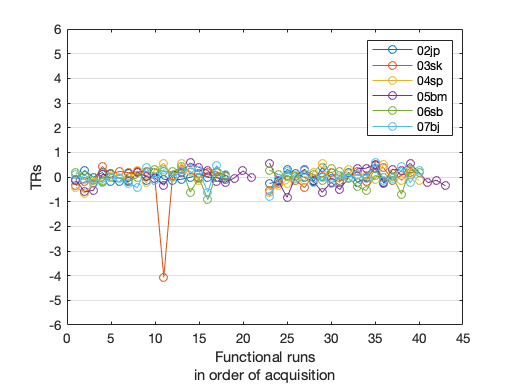

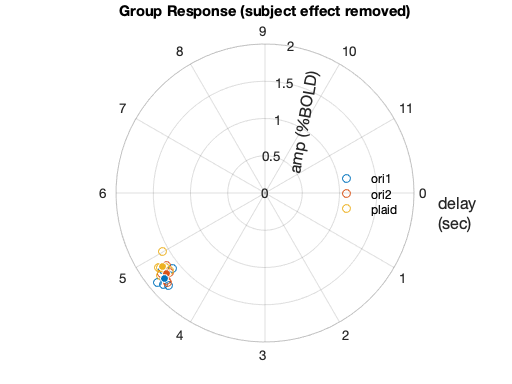

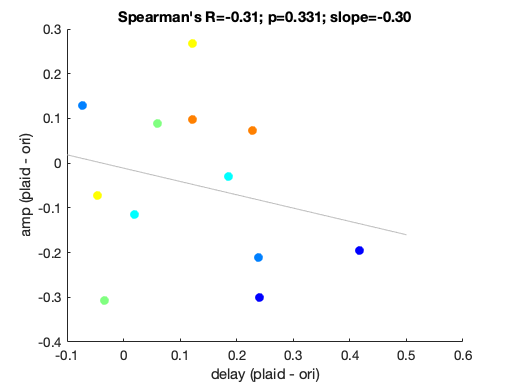

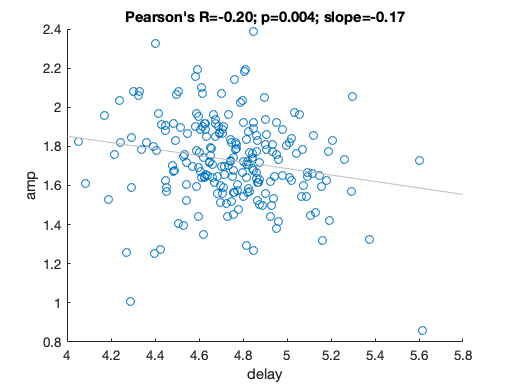

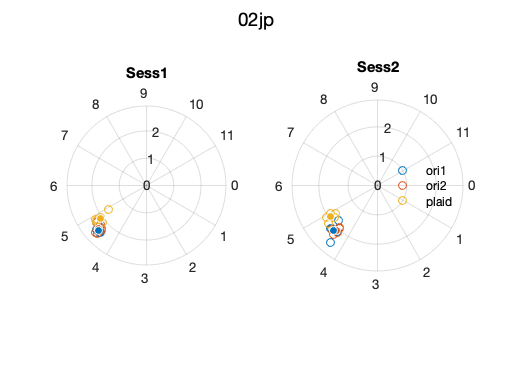

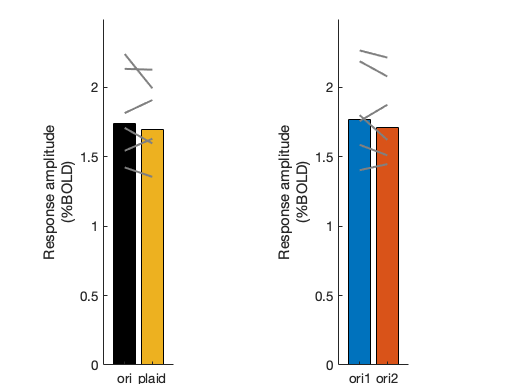

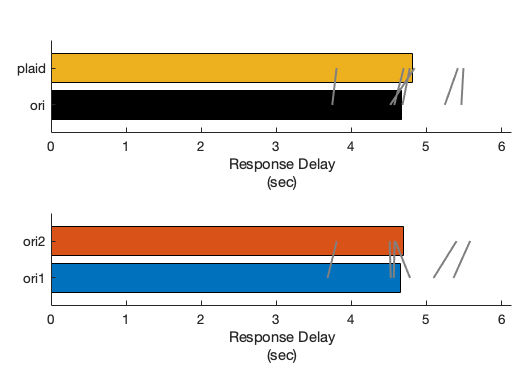

In [3]:
exclusion = sinusoidalGroupAnalysis

### Visualize the sinusoidal response in V1

IN: BOLD hemodynamic responses (HR) from anatomical V1 ROI (C-derived/DecodingHR/zHr)
F(IN)->OUT: threshold included voxels and analyse HR averaged across the ROI
OUT: figures

ans =

    0.9290    0.6940    0.1250
    0.8500    0.3250    0.0980
         0    0.4470    0.7410



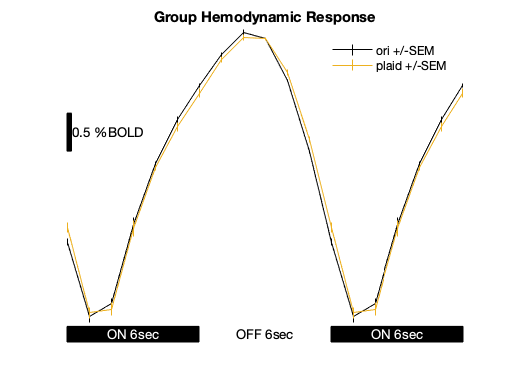

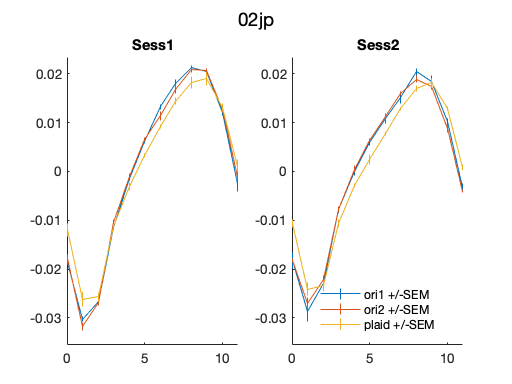

In [4]:
hrGroupAnalysis([],exclusion)

### Conclusion on Prediction 1
The inhibition involve by the overlayed presentation of orhtogonal grating increases the hemodynamic delay with little effect on the amplitude of the hemodynamic response. The excitation/inhibition balance is altered, not the overlay level of synaptic acticity.

## Prediction 2: Stimulus orientation can be predicted not only from the multivoxel pattern of BOLD responses, but also from the pattern of BOLD delays

In [5]:
clear res

In [6]:
svmSpace = 'polMag';
resTmp = runDecoding(svmSpace,[],exclusion);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.(svmSpace) = resTmp;

------
IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived/DecodingHR/zSin)
F(IN)=OUT: threshold included voxels and decode ROI response pattern to predict stimulus orientation
OUT: figures and stats (C-derived/DecodingHR/zSin)
---
SVM space: polMag; Vox selection: respF_p
Group accuracy = 89/142 (62.7%; binomial p=0.001)
mean(nObs) =12
mean(nFeat)=1069


In [7]:
svmSpace = 'polDelay';
resTmp = runDecoding(svmSpace,[],exclusion);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.(svmSpace) = resTmp;

------
IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived/DecodingHR/zSin)
F(IN)=OUT: threshold included voxels and decode ROI response pattern to predict stimulus orientation
OUT: figures and stats (C-derived/DecodingHR/zSin)
---
SVM space: polDelay; Vox selection: respF_p
Group accuracy = 71/142 (50.0%; binomial p=0.467)
mean(nObs) =12
mean(nFeat)=1069


In [8]:
svmSpace = 'cartReal';
resTmp = runDecoding(svmSpace,[],exclusion);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.(svmSpace) = resTmp;

------
IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived/DecodingHR/zSin)
F(IN)=OUT: threshold included voxels and decode ROI response pattern to predict stimulus orientation
OUT: figures and stats (C-derived/DecodingHR/zSin)
---
SVM space: cartReal; Vox selection: respF_p
Group accuracy = 85/142 (59.9%; binomial p=0.007)
mean(nObs) =12
mean(nFeat)=1069


    {'polMag'}    {'polDelay'}    {'cartReal'}

signedrank   = 15.00   5.50  15.00
signedrank p = 0.0312  0.5000  0.0312
group accuracy  = 62.68%  50.00%  59.86%
binomial   p    = 0.0009   0.4666   0.0073


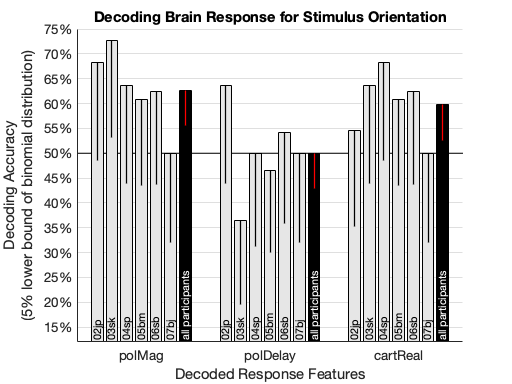

In [9]:
plotDecoding(res)

### Conclusion on Prediction 2
Sensitivity of the paradigm confirmed.
But stimulus presented alone do not significantly affect the delay.
Neural inhibition activity related to cross-orientation suppression may only be sufficiently strong under situations where there is sufficient feed-forward drive to the inhibited neural population.

## Conclusion
Overlayed orthogonal gratings induced mutual ihibitory activity between two neural populations (alter the excitation/inhibition balance) that contribute the the fMRI response in a way that delays to measured response.

Gratings presented alone induce balanced levels of excitation and inhibition, leading to indiscriminable hemodynamic delays.